# Анализ бизнес показателей
Развлекательное приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.
# Задача разобраться в причинах и помочь компании выйти в плюс.
## Есть данные о 
- пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
## Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.
### Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.
### Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

# 1.Загрузка данных и подготовка их к анализу

In [2]:
### Чтение данных
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
try:
    visits, orders,costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'), # покупки
    pd.read_csv('/datasets/costs_info_short.csv'), # траты на рекламу
)
except:
    visits, orders,costs = (
    pd.read_csv('visits_info_short.csv'), # журнал сессий
    pd.read_csv('orders_info_short.csv'), # покупки
    pd.read_csv('costs_info_short.csv'), # траты на рекламу
)
    # преобразуем данные о времени
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [3]:
# проверяем типы данных
display(visits.head()), visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.2+ MB


(None, None)

**Вывод**


Мы видим, что тип данных окончания сессии "Session End" соответствует тпу object.

In [4]:
# Воспользуемся переводом
visits['Session End']= visits['Session End'].astype('datetime64')

In [5]:
display(orders.head()), orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


(None, None)

In [6]:
display(costs.head()), costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None, None)

**Вывод**


Мы видим, что тип данных "dt" соответствует тпу object. Переводить в нужный формат будем в функции get_profiles

In [7]:
# Дубликаты
data = [visits,costs, orders]

for d in data :
    print('Количество дубликатов :', d.duplicated().sum())

Количество дубликатов : 0
Количество дубликатов : 0
Количество дубликатов : 0


In [8]:
# сначала тут мы получаем названия столбцов .columns , 
#потом обрабаываем их как строки и переводим в нижний регистр .str.lower() ,
# потом в строках заменяем пробелы на нижние подчеркивания .str.replace(' ', '_')
visits.columns = visits.columns.str.lower().str.strip().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.strip().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.strip().str.replace(' ', '_')
costs
#visits.columns = [x.lower().strip().replace(' ', '_') for x in visits.columns.values] тоже вариант

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


## Вывод

- Данные чистые, дубликатов и аномалий нет.
- Названия столбцов приведены в нижний регистр, данные типа object переведены в формат datetime.

# 2. Расчёт и анализ LTV, ROI, удержания и конверсии.

In [9]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [10]:
# функция для создания пользовательских профилей
events = None
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left') # смотри параметры: 'dt'

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [11]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [12]:
# # функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# 3. Исследовательский анализ данных
- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
- Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [17]:
# Получим профили пользователей. 
# Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу
# получаем профили пользователей
profiles = get_profiles(visits, orders,events,costs)  #нужно соблюдать порядок
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [18]:
print('Минимальная дата привлечения пользователей :', profiles['dt'].min(),
'\nМинимальная дата привлечения пользователей :', profiles['dt'].max())

Минимальная дата привлечения пользователей : 2019-05-01 
Минимальная дата привлечения пользователей : 2019-10-27


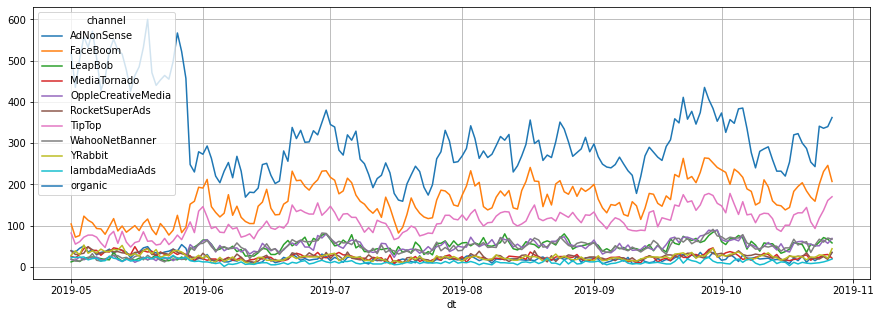

In [19]:
# Сначала я хотела построить графики, но они менее информативны.
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

In [20]:
# доля
# для табл. с распределением количества пользователей по каналам привлечения, 
# а также количества и доли платящих пользователей для каждого канала привлечения:
# сгруппируем данные табл.profiles по столб.channel и 
# посчитаем общее количество пользователей по столб. user_id методом count(),
# количество платящих пользователей по столб. payer методом sum(), посчитаем долю платящих пользователей:
 
channel_users = profiles.groupby('channel').agg({'user_id':'count', 'payer':'sum'})
 
# вычисляем долю платящих пользователей по каждому каналу привлечения:
channel_users['share_of_payers'] = channel_users['payer']/channel_users['user_id'] * 100
 
# отсортируем табл. по убыванию доли платящих пользователей по регионам:
channel_users.sort_values(by = 'share_of_payers', ascending=False)

,user_id,payer,share_of_payers
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


In [21]:
channel_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, AdNonSense to organic
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          11 non-null     int64  
 1   payer            11 non-null     int64  
 2   share_of_payers  11 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 352.0+ bytes


In [22]:
profiles.groupby('region').agg({'user_id': 'nunique',
                               'payer': 'mean'}).sort_values(by='payer', ascending=False) 

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


###### Из США пользователи приходят в приложение больше всего, а так же на США приходится больше всего платящих пользователей.

In [23]:
profiles.groupby('device').agg({'user_id': 'nunique',
                               'payer': 'mean'}).sort_values(by='payer', ascending=False) 

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


##### Больше всего пользователей пользуются айфоном и андройдом, что может быть связано с использованием мобильных приложений. Эти же устройста предпочитают платящие пользователи.

In [24]:
profiles.groupby('channel').agg({'user_id': 'nunique',
                               'payer': 'mean'}).sort_values(by='user_id', ascending=False) 

,user_id,payer
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


##### При изучении рекламных источников привлечения, мы видим, что есть несомненный лидер FaceBoom из которого пришло больше всего платящих пользователей.

### 3. Выводы
- Наибольшее количество пользователей и платящих пользователей -- из США.
- Наибольшее количество количество пользователей и платящих пользователей используют iPhone и Mac. Что скорее всего говорит о том, что это наша реальность.
- Самое большое количество платящих пользователей приходит из FaceBoom, хотя если обратить внимание на органических пользователей, то видно, что их в два раза больше.
- Tip Top не отстает, показывая себя лучше, чем другие каналы.

## 4 Маркетинг
-	Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [25]:
# Общая сумма
print('Общая сумма расходов на маркетинг:', costs['costs'].sum().round(2))

Общая сумма расходов на маркетинг: 105497.3


In [26]:
# Распределение трат по рекламным источникам
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


 ##### Вывод 4.1.
 В Tip Top и FaceBoom мы вкладывается большое количество денег, в остальные сильно меньше.

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

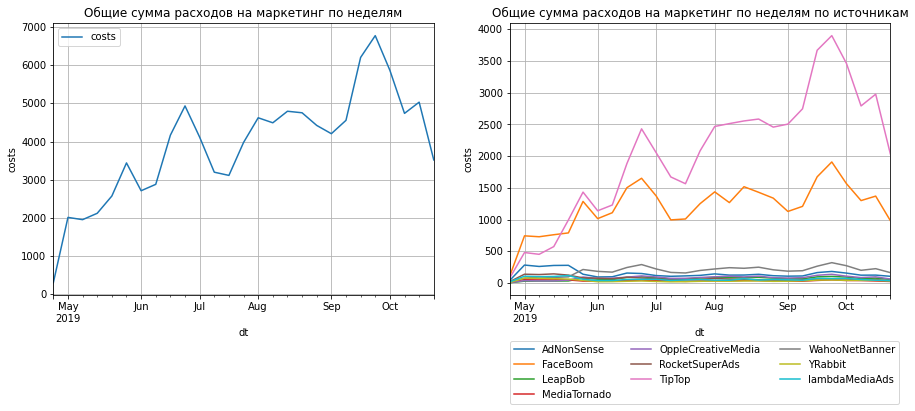

In [27]:
#выделяем недели и месяцы
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')
 
#строим график
 
plt.subplots(figsize = (15, 5))
 
costs.groupby(costs['week']).agg({'costs': 'sum'}).plot(ax = plt.subplot(1, 2, 1))
plt.ylabel('costs')
plt.xlabel('dt')
plt.title('Общие сумма расходов на маркетинг по неделям')
plt.grid()
 
costs.pivot_table(index=costs['week'], columns='channel', 
                  values='costs', aggfunc='sum').plot(ax = plt.subplot(1, 2, 2))
plt.ylabel('costs')
plt.xlabel('dt')
plt.title('Общие сумма расходов на маркетинг по неделям по источникам')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.grid()
 
plt.show()

##### Вывод 4.2
Смотря на оба графика мы видим, что кривая слева словно повторяет общую сумму расходов на маркетинг в Tip Top. Самый большой пик приходится на сентябрь. Летом в июле график проседает. На остальные источники траты распределены более менее равномерно ( особенно в сравнении с Tip Top).

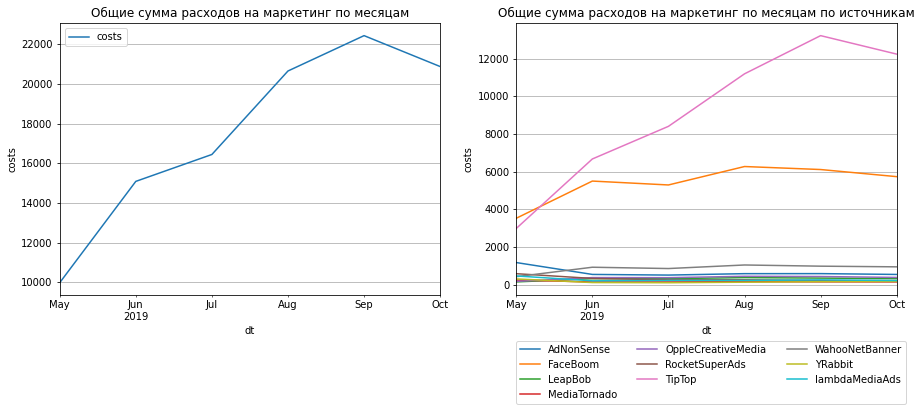

In [28]:
 
plt.subplots(figsize = (15, 5))
costs.groupby(costs['month']).agg({'costs': 'sum'}).plot(ax = plt.subplot(1, 2, 1))
plt.ylabel('costs')
plt.xlabel('dt')
plt.title('Общие сумма расходов на маркетинг по месяцам')
plt.grid()
 
costs.pivot_table(index=costs['month'], columns='channel', 
                  values='costs', aggfunc='sum').plot(ax = plt.subplot(1, 2, 2))
plt.ylabel('costs')
plt.xlabel('dt')
plt.title('Общие сумма расходов на маркетинг по месяцам по источникам')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.grid()
 
plt.show()

##### Вывод 4.3
- График иллюстрирующий общую сумму расходов на маркетинг по месяцам, показывает пик на сентябрь. На Tip Top расходуется очень большое количество денежных ресурсов.
- В Tip Top и FaceBoom вкладывается большое количество денежных средств. В то время как в остальные рекламные исочники деньги распеделяются более равномерно. Не понятно, эффективно ли такое распределение.

В профилях появился новый столбец acquisition_cost со стоимостью привлечения каждого посетителя.
Выясним, как меняется стоимость привлечения для каждого источника. 
Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

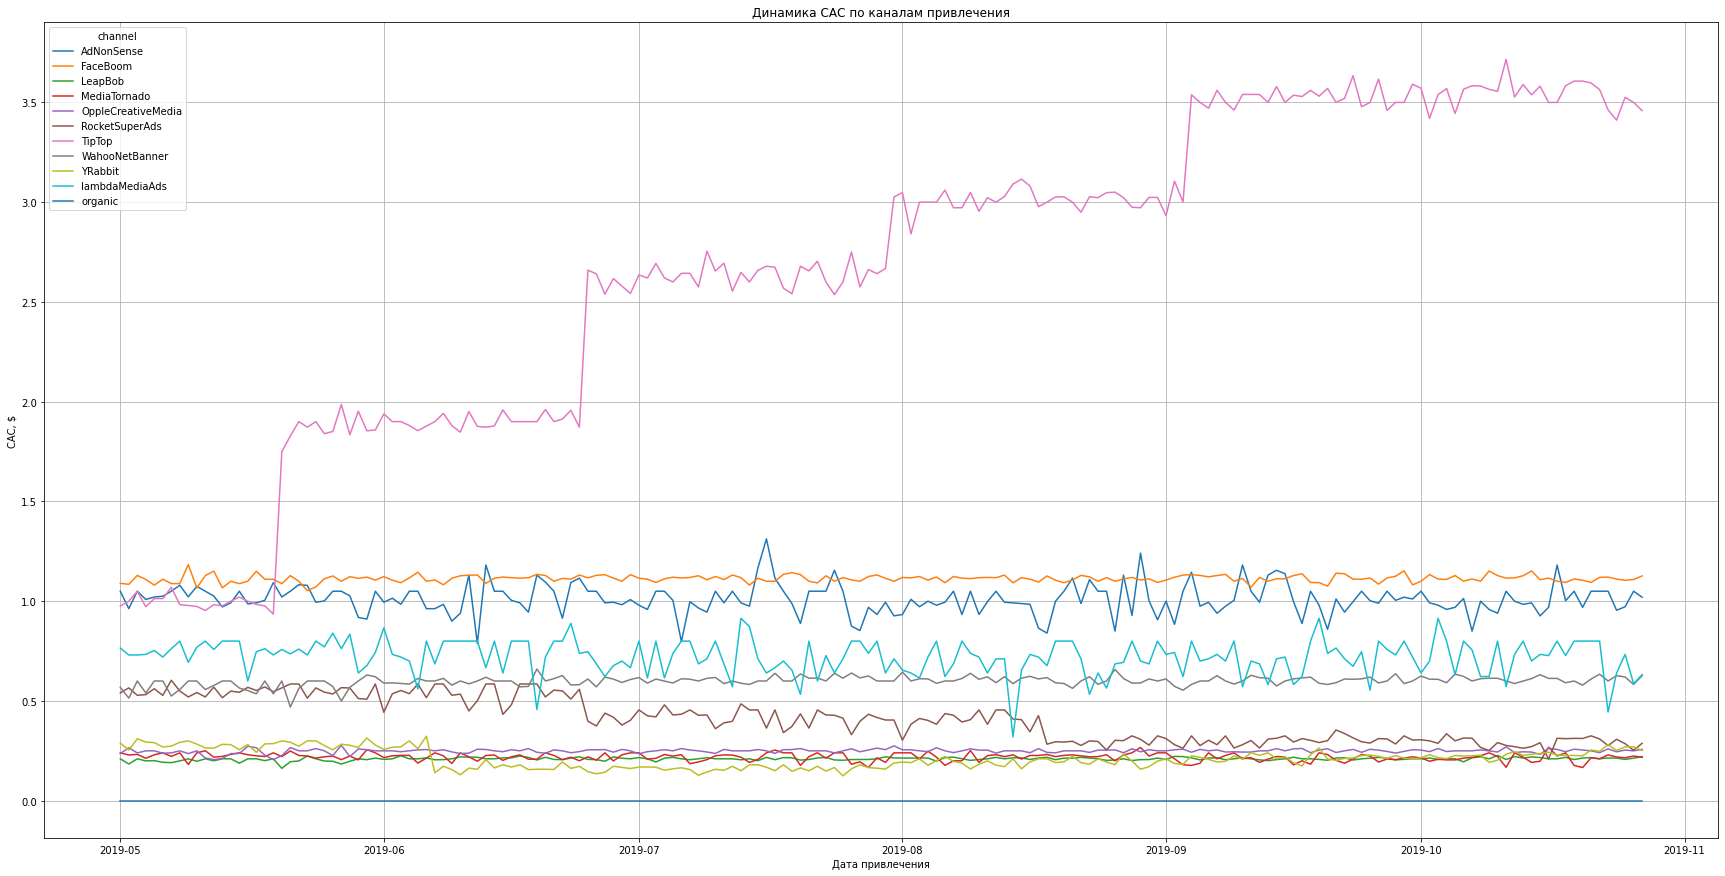

In [29]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(30, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [30]:
profiles_no_org = profiles.query('channel != "organic"')
profiles_no_org['acquisition_cost'].mean()

1.1274813239427588

In [31]:
profiles_acquisition_cost = profiles_no_org.pivot_table(
    index = 'channel',
    values = 'acquisition_cost',
    aggfunc = 'mean'
).sort_values(
    by ='acquisition_cost',
    ascending = False
).reset_index()

profiles_acquisition_cost

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


##### Вывод 4.4
- Мы видим, что стоимость привлечения каждого посетителя в Tip Top очень высокая. Растет от месяца к месяцу примерно каждые две недели.У остальных источников такого нет. Стоимость FaceBoom в два с половиной раза ниже.
- Необходимо оценить эффективность такого расхода на рекламу. Потому что возможно аудитория у каналов разного возраста, чем можно объяснить низкую долю платящих пользователей в сравнении со стоимостью превлечения.

## 5. Оцените окупаемость рекламы
- Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.
- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы: 
`o	Окупается ли реклама, направленная на привлечение пользователей в целом?`
`o	Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?`
`o	Чем могут быть вызваны проблемы окупаемости?`

In [32]:
# Установим момент и горизонт анализа данных. 
#  Предположим, что на календаре 1 ноября 2019 года, и зададим горизонт анализа в две недели.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### 5.1 - Теперь можно приступать к анализу.
###### Мы не платим за органических пользователей, ввиду того, что нам нужно оценить окупаемость рекламы, корректнее будет их исключить.

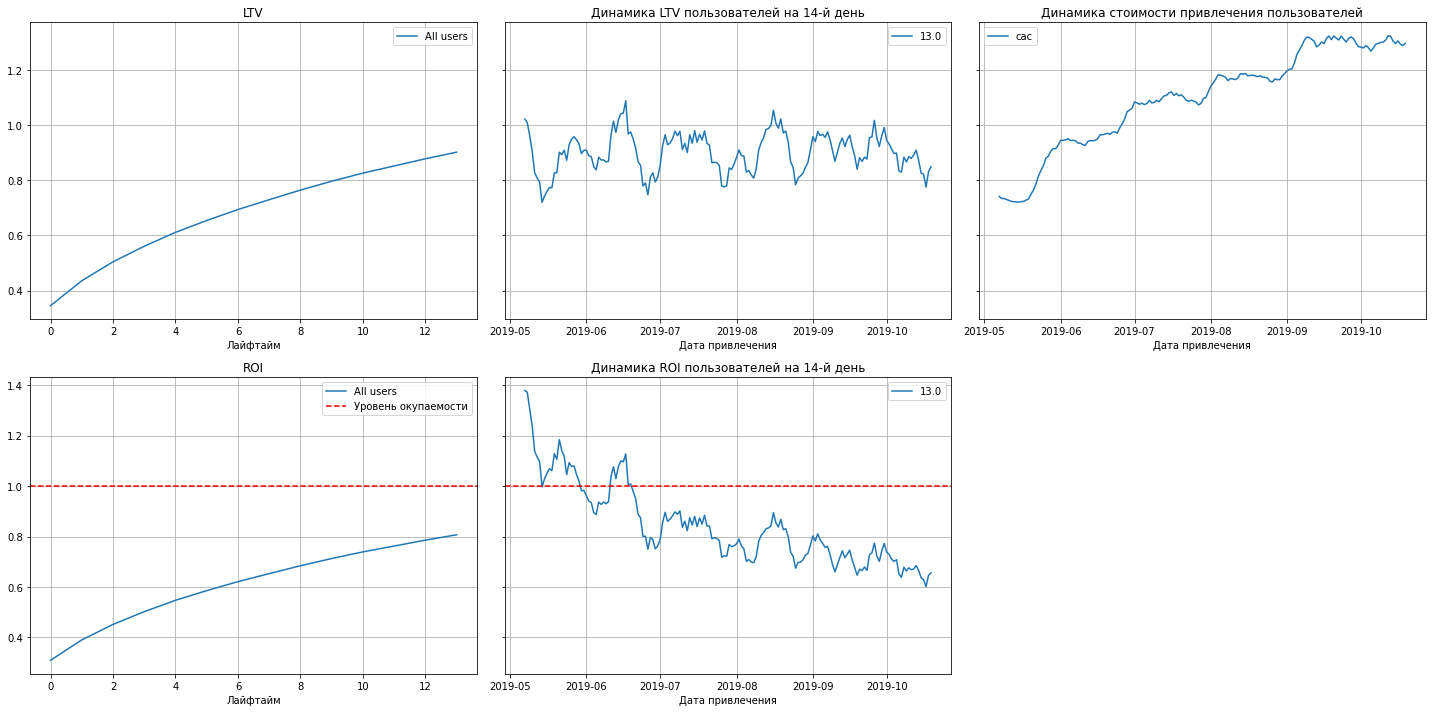

In [33]:
profiles_no_org = profiles.query('channel != "organic"')
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### 5.1.1 Выводы по графикам
- LTV общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок непостоянна. 
- Динамика LTV нестабильная, есть резкие скачки и обвалы. На LTV может влиять сезонный фактор.
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC нестабилен. Возможно  дело не только в увеличении рекламного бюджета.
- Получается, что мы тратим много на рекламу, однако эффекта нет - пользователи не окупаются.CAC растет, ROI снижается.
- Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
- Начнём с разбивки по каналам: передадим параметру dimensions столбец channel

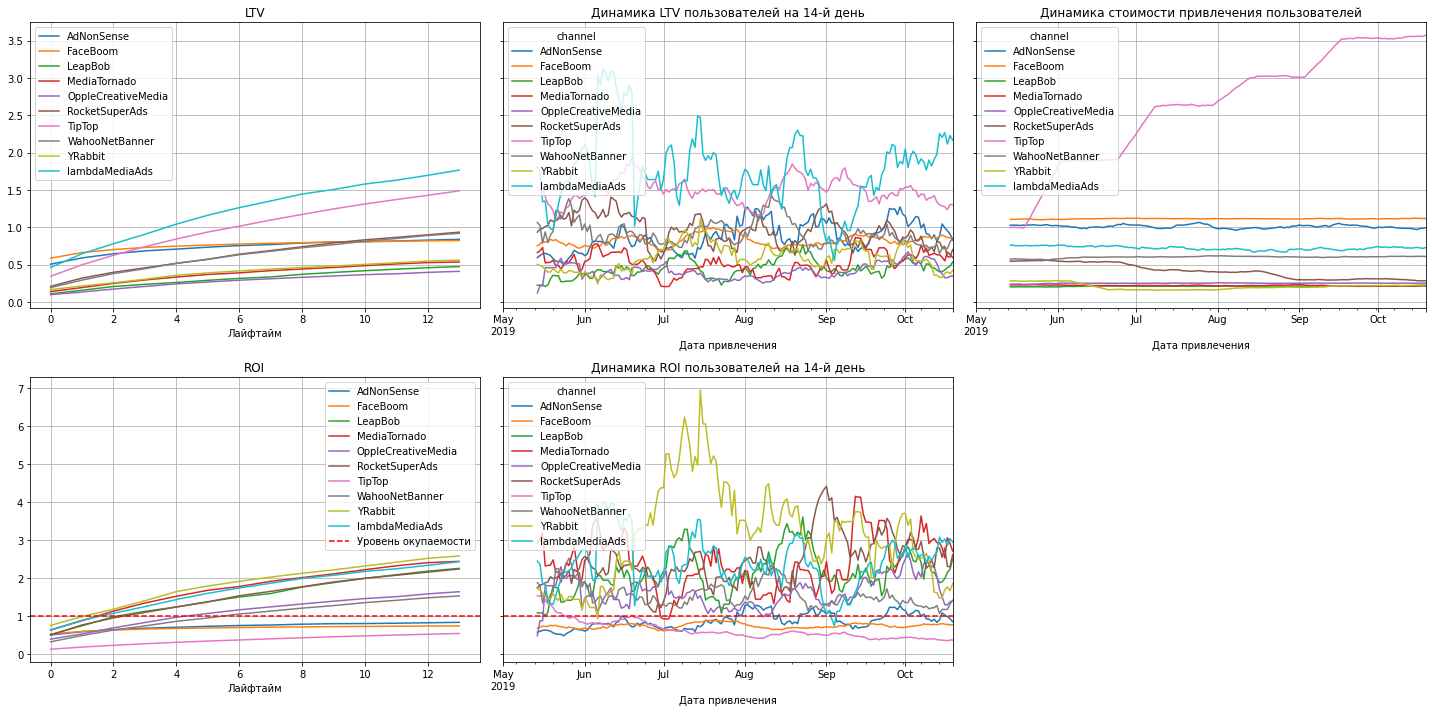

In [34]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### 5.1.2 Выводы по графикам
- Tip Top в который вкладывается больше всего денег на рекламу, не окупается, это же мы видим и относительно FaceBoomа.AdNonSense так же не окупается.
- По остальным каналам окупаемость наступает примерно на 5- 6 день.
- При этом у Tip Topа высокими темпами растет цена привлечения одного пользователя. Тогда как у других каналов цена распределена более менее равномерно.
- Нужно обратить внимание на Tip Top.

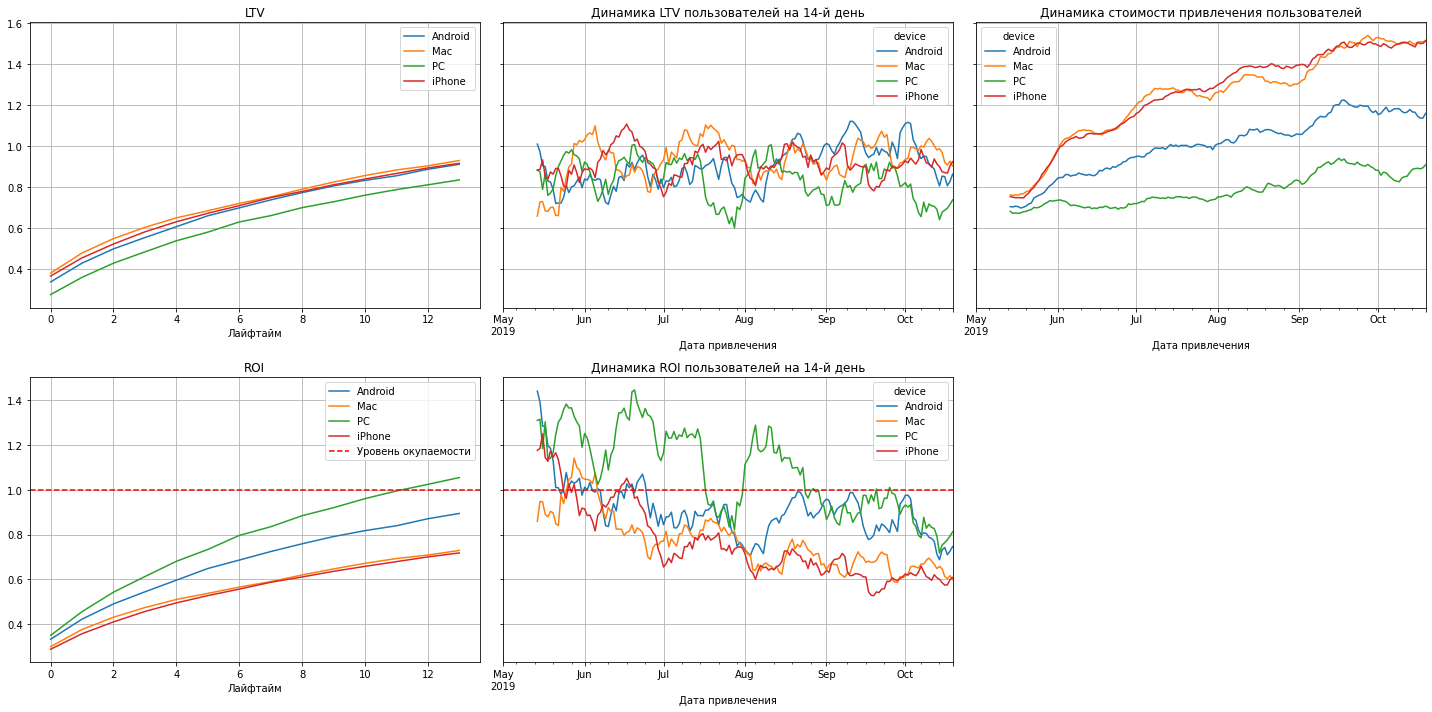

In [35]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### 5.1.3. Выводы по графикам
- Окупаемость у Macа iPhonа ниже всех, далее Android. Лучше всего окупаются как ни странно ПК.
- При этом стоимость привлечения пользвателей ПК ниже, чем у рассматриеваемых с ним устройств.

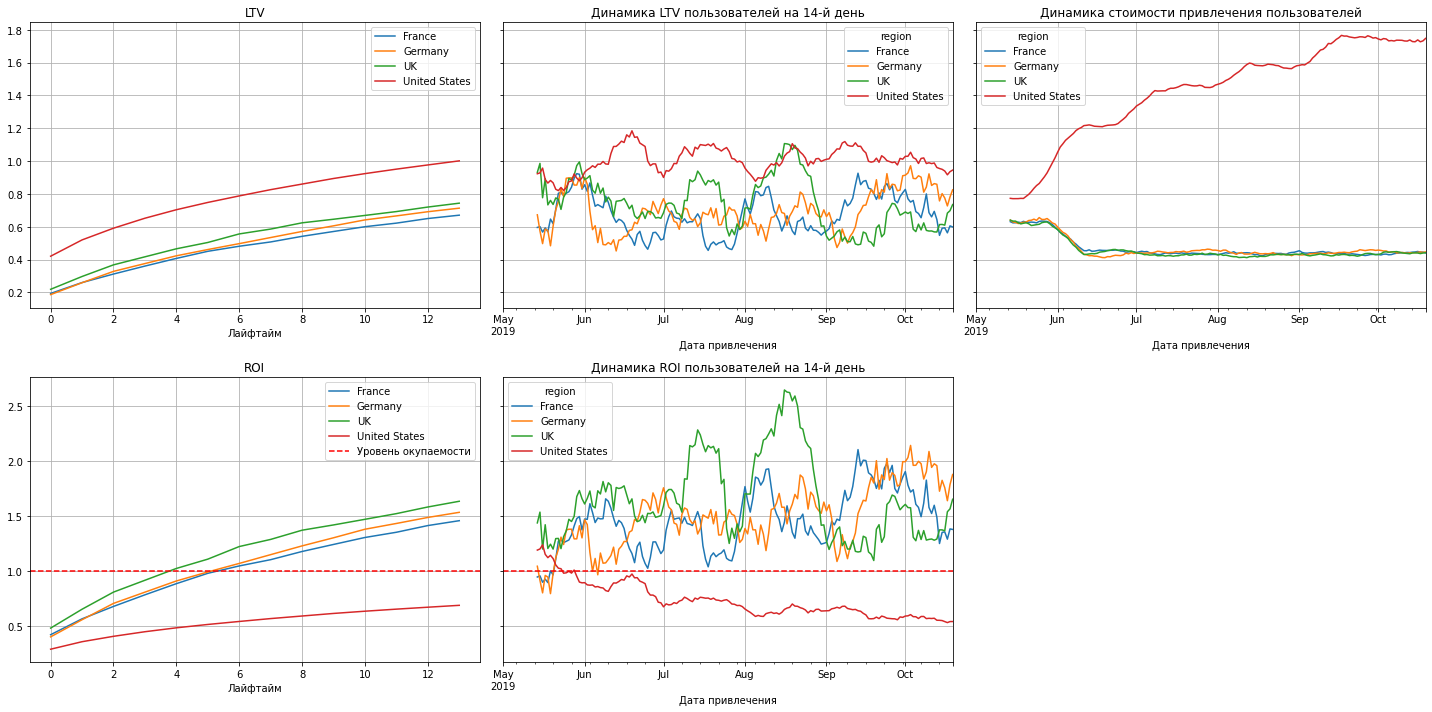

In [36]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

### 5.1.4. Выводы
- Затраты на рекламу (ROI) не окупаются по США, а CAC быстро растет. Без США инвестиции начали бы себя окупать примерно на 4-5 дни.
- Выше всего окупается Великобритания, за ней идут Германия и Франция.

- #### Итог : США и канал Tip Top - самые проблемные места, потому что это неоправданные траты.

### 5.2. Конверсия и удержание

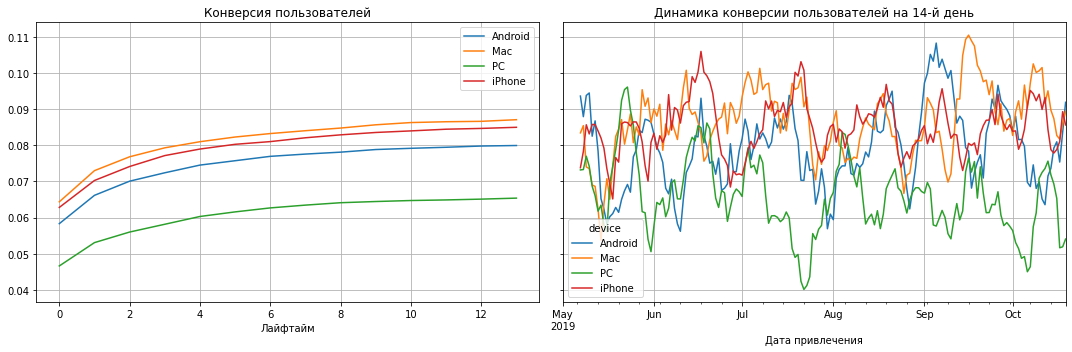

In [37]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

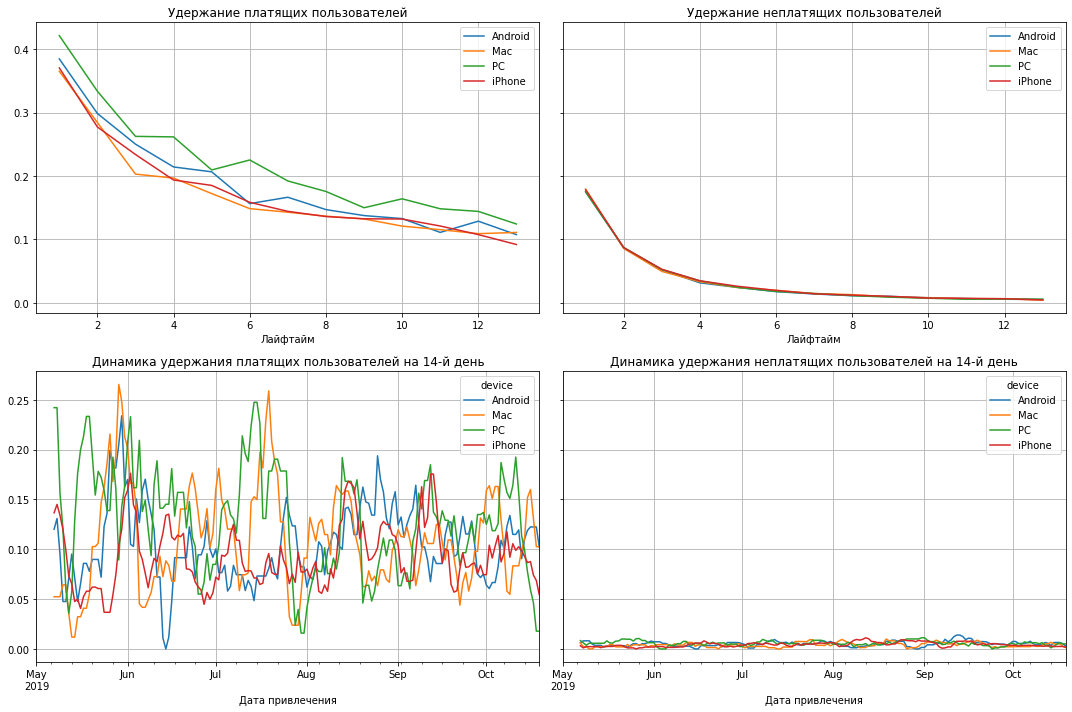

In [38]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы**


- Удержание платящих пользователей на ПК самое высокое, далее андройд, айфон и мак. Нужно посмотреть на старторую страницу на ПК и в мобильном приложении, сравнить. Может на ПК приложение выглядит более привлекательно. Возможно книпка "купить" в приложении мелкая, или её сразу не видно.
- Рассматривая удержание в динамике, мы видим сильную нестабильность на всех устройствах : разкие скачки и обвалы. Нужно более деталь рассмотреть в какие даты это происхоит. Возможно на выходных люди реже заходят в приложение. Может быть связано с отпусками (летом сильные скачки вверх и сильные обвалы вниз)

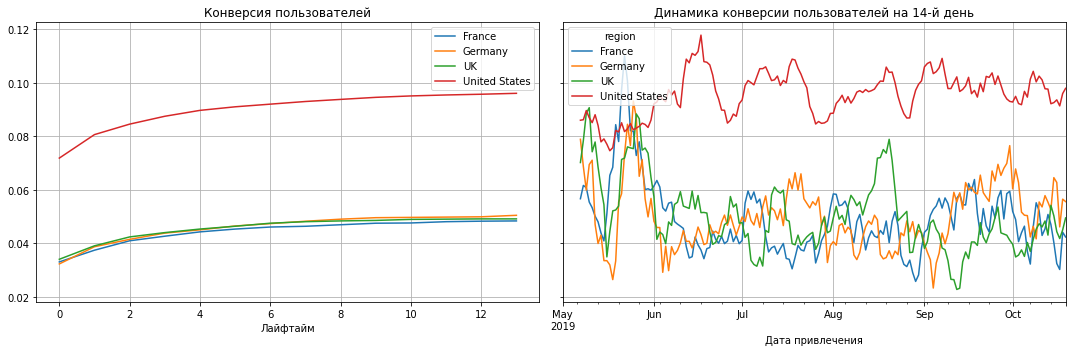

In [39]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы**

В США конверсия выше чем в остальных странах, но в динамике видно обвалы и падения каждые две недели. Нужно переговорить с отделом маркетинга спросить их: они каждые две недели запускают рекламу и прореряют её эффективность? И опять же посмотреть по датам более детально.

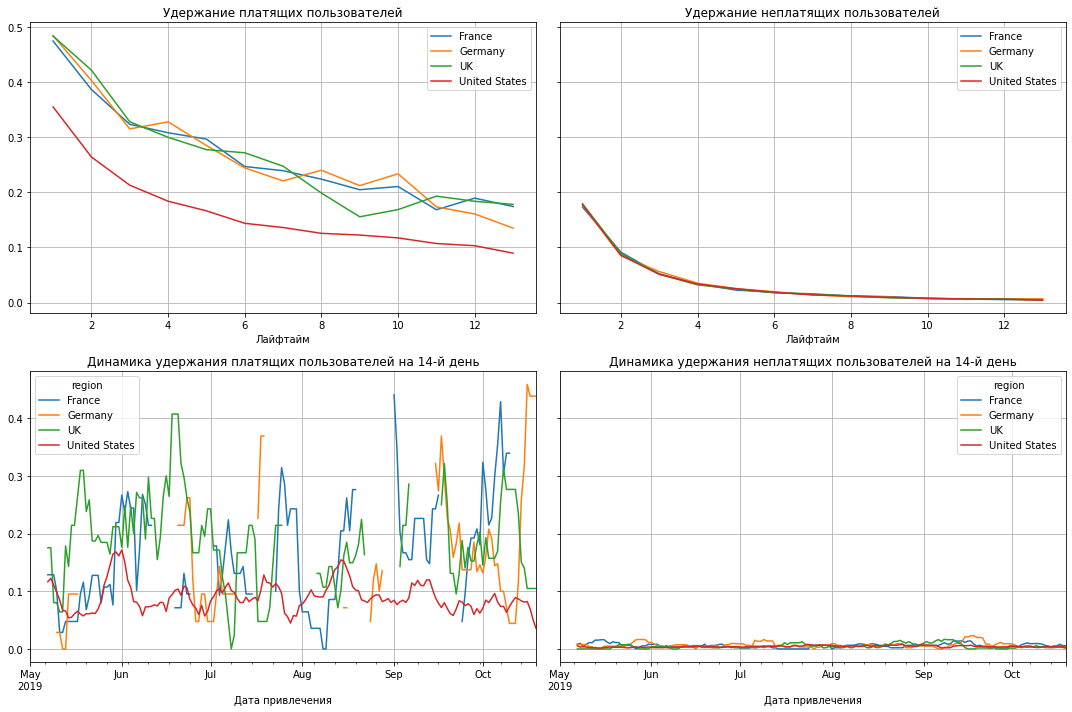

In [40]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы**


- Не смотря на высокую конверсию, удержание платящих пользователей в США ниже, чем в остальных странах.
- В динамике так же видим проблемы.

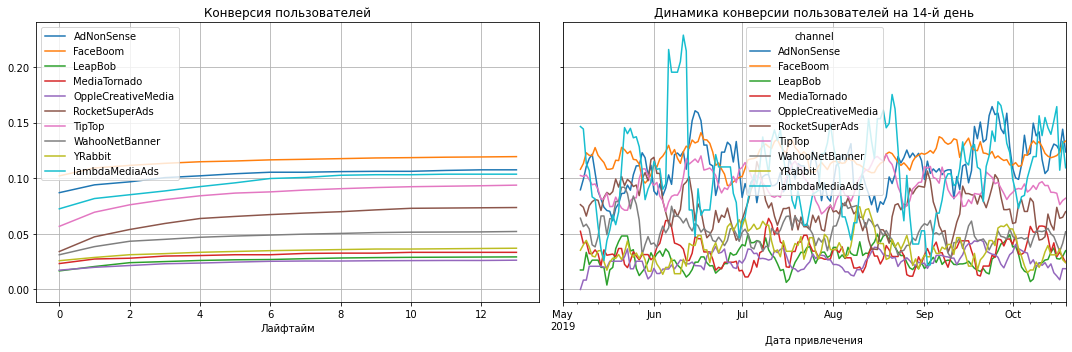

In [41]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы**


- Конверсия пользователей в FaceBoomе высокая, но если смотреть динмику, то видно, что динамика ниже, чем у lambdaMediaAds(возможно есть смысл сравнить рекламу на всех каналах и перераспределить бюджет).

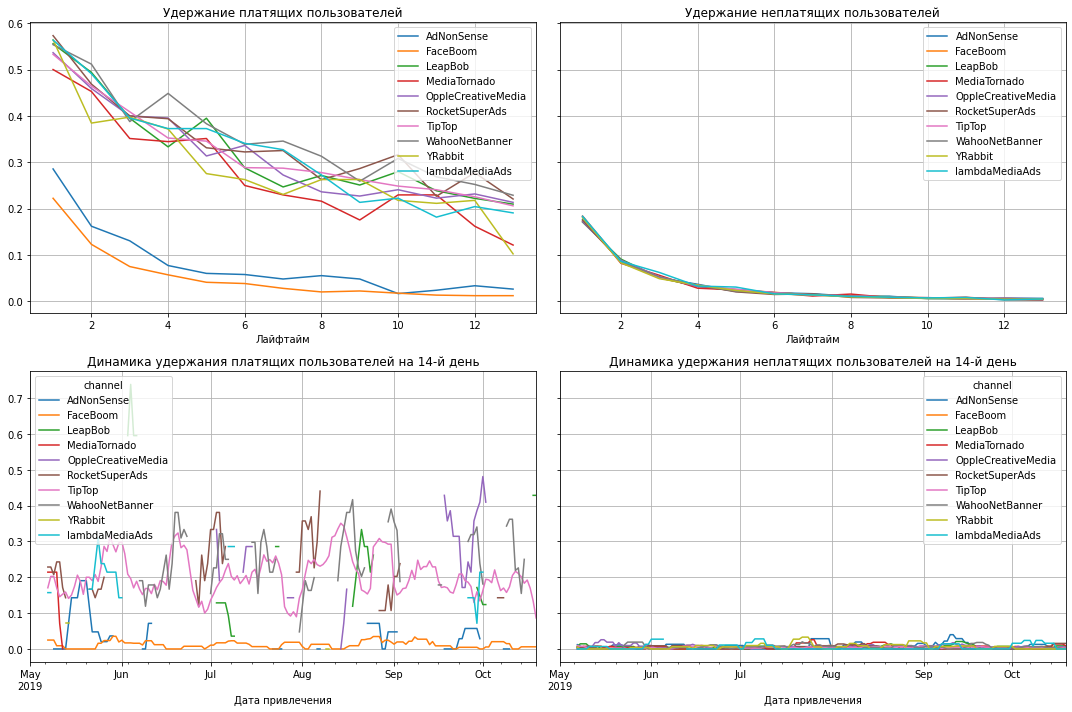

In [42]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы**


- Просадка в каналах FaceBoom и AdNonSense. У остальных более ровно.
- В динамике FaceBoom так же находится не в лучшем виде.
- А вот канал RocketSuperAds проявляет себя относительно лучше других.

### 5.2.1. Выводы
 - В разбивке по устройствам проблем нет.
 - В разбивке по каналам : хуже всего удерживаются пользователи AdNonSense и FaceBoom. В тоже время они являются лидерами по конверсии.Что лишний раз подтверждает - не стоит смотреть только на конверсию.
 - Tip Top в удержании неплох, в конверсии средний, но по другим показателям мы помним. 
 - Большая часть пользователей из США, но они плохо удерживаются. Так же это единственная страна, которая не окупает инвестиции.

# Общий вывод


- **Причины неэффективности привлечения пользователей**

- Большие, неоправданные инвестиции в каналы Tip Top и FaceBoom. Можно посмотреть на возраст аудитории.Может быть в канале Tip Top более молодая аудитория, которая не может купить подписку. А  канал FaceBoom плохо удерживает аудиторию не смотря на высокую конверсию. Может они случайно нажимают на всплывающее окошко рекламы.
 
- Во всех странах кроме США окупаемость происходит на 4-5 дни. 
 
- По устройства самая высокая окупаемость у ПК ( на 11 день), у остальных ниже.
 
- В США высокая конверсия, а вот удержание и окупаемость - низкие. Для более развернутого анализа нужны характеристики такие как : стоимость покупки, чтобы сравнить с другими странами. Может быть именно для США подписка стоит дорого, или есть какой-то минимальный порог заказа.
 
- В  Tip Top вкладывают больше всего средств в рекламу, но канал её не окупает. Это может быть связано с возрастом аудитории и их платежеспособностью. Возраст молодой, платежеспособность низкая.
     
- У AdNonSense и FaceBoom низкое удержание и LTV не смотря на высокую конверсию, что негативно сказывается на окупаемости. В целом стоит пересмотреть направление инвестиций. Например на канал RoketSuperAds в США, который хорошо удерживает пользователей и конвертирует их в покупателей.
   
- Так же стоит рассотреть ситуацию с рекламой на каналах Tip Top и FaceBoom именно на ПК. Возможно в одних приложениях нужно владываться в рекламу на одних каналах, а для пользователей ПК рассматривать рекламу на других каналах. То есть разные каналы, разная аудитория, разные каналы. Другими словами найти свою нишу.





- **Рекомедации для отдела маркетина:**


- найти причины низкого количества платящих пользователей по Европе ( например, воронку).Возможно в перспективе данные регионы покажут себя хорошо. Если привлечь инвестиции на рекламу скжем на канал  RoketSuperAd, так как в США он хорошо удерживает пользователей и конвертирует их в покупателей;

- отдельно рассмотреть США с точки зрения рекламных каналов.

- перераспределить рекламный бюджет на каналы помимо  Tip Top и FaceBoom так как они показывают себя отрицательно не смотря на большое количество пользователей.
 
- канал RoketSuperAds в США хорошо удерживает пользователей и конвертирует их в покупателей, нужно обратить на него внимание.
- проанализировать целевую аудиторию США. Посмотреть их платежеспособность, возраст.